In [1]:
#clone file from github yodialfa
# !git clone https://github.com/yodialfa/Segmentation_Recomendation.git

In [2]:
#install surprise
# !pip install scikit-surprise


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time, warnings
import datetime as dt

# Data Understanding

Okay, in this time we will segmentation the customer using RFM analisys and K-Means clustering. First I will tell the data.
here I have some data that I found from kaggle.com and here the resources : https://www.kaggle.com/datasets/lakshmi25npathi/online-retail-dataset
the data has Atribute InvoceeNo, StockCode, Description, Quantity, UnitPrice, CustomerID, and Country.
Data Dictionary : <br>
- InvoiceNo : number code of the transacation
- StockCode : the code of item
- Description : dthe description of item
- Quantity : count of item buying.
- InvoiceDate : date of customers transcation full with the time.
- UnitPrice : the price per item.
- Country : country of customers live.

In [4]:
rawdf = pd.read_excel('Segmentation_Recomendation/OnlineRetail.xlsx')
df = rawdf

In [5]:
df = rawdf
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [6]:
#data understanding
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
#total rows and columns
df.shape


(541909, 8)

In [8]:
#check unique value for each columns
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [9]:
#check value counts in country columns
df['Country'].value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

# Data Cleansing

In [10]:
#check total of missing value
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [11]:
df['StockCode'] = df['StockCode'].astype(str)

# Applying upper() method on 'StockCode' column
df['StockCode'] = df['StockCode'].apply(lambda x: x.upper())

# # Applying upper() method on 'StockCode' column
# df['Description'] = df['Description'].apply(lambda x: x.upper())

In [12]:
#to define Description and fill on Description Nan value
dftemp = df[df['Description'].notna()]
stockc = dftemp.drop_duplicates('StockCode')
stockc

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
504104    578942     23561               SET OF 6 RIBBONS PARTY         1   
507867    579187     23609       SET 10 CARDS SNOWY ROBIN 17099         1   
512588    579512     23617  SET 10 CARDS SWIRLY XMAS TREE 17104         2   
527065    580691    90214U            LETTER "U" BLING KEY RING        12   
540421    581483     23843          PAPER CRAFT , LITTLE BIRDIE     80995   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
...                    ...        ...         ...             ...  
504104 2011-11-27 13:29:00       2.89     17288.0  United Kingdom  
507867 2011-11-28 15:31:00       2.91         NaN  United Kingdom  
512588 2011-11-29 16:47:00       2.91         NaN  United Kingdom  
527065 2011-12-05 15:48:00       0.29     13790.0  United Kingdom  
540421 2011-12-09 09:15:00       2.08     16446.0  United Kingdom  

[3848 rows x 8 columns]

In [13]:
#check null on stockc
stockc.isna().sum()

InvoiceNo         0
StockCode         0
Description       0
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID     1151
Country           0
dtype: int64

In [14]:
#define variable 
iss = ['StockCode','Description']
#define dataframe to create dict
stockc = stockc[iss]
#create dictionary
stockc = dict(zip(stockc.StockCode, stockc.Description))



In [15]:
#fill stokc on Nan in Description Column
df['Description'] = df['StockCode'].apply(lambda x: stockc.get(x))

In [16]:
#check again isna on df datframe
df.isna().sum()

InvoiceNo           0
StockCode           0
Description       110
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

but in description still has nan value, we will check first

In [17]:
#cek again nan values in desription
nandes = df[df['Description'].isna()]
nandes

InvoiceNo StockCode Description  Quantity         InvoiceDate  \
1970      536545     21134        None         1 2010-12-01 14:32:00   
1987      536549    85226A        None         1 2010-12-01 14:34:00   
1988      536550     85044        None         1 2010-12-01 14:34:00   
2024      536552     20950        None         1 2010-12-01 14:34:00   
2026      536554     84670        None        23 2010-12-01 14:35:00   
...          ...       ...         ...       ...                 ...   
280749    561493     84761        None       -11 2011-07-27 13:59:00   
280754    561498     21610        None       -14 2011-07-27 14:10:00   
281615    561555    37477B        None       -11 2011-07-28 10:21:00   
281616    561557    37477C        None       -31 2011-07-28 10:21:00   
346849    567207    35592T        None         4 2011-09-19 11:01:00   

        UnitPrice  CustomerID         Country  
1970          0.0         NaN  United Kingdom  
1987          0.0         NaN  United Kingdom  
1988          0.0         NaN  United Kingdom  
2024          0.0         NaN  United Kingdom  
2026          0.0         NaN  United Kingdom  
...           ...         ...             ...  
280749        0.0         NaN  United Kingdom  
280754        0.0         NaN  United Kingdom  
281615        0.0         NaN  United Kingdom  
281616        0.0         NaN  United Kingdom  
346849        0.0         NaN  United Kingdom  

[110 rows x 8 columns]

there are anomaly

In [18]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description       110
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

we have to drop it because there are 0 values in unit price and customerID is Null

In [19]:
#drop NaN value in Description Column Only
df = df[df['Description'].notna()]
df.isna().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     134970
Country             0
dtype: int64

and now no missing value, the we will drop InvoiceNo contain C because the customers has canceled order

In [20]:
df['InvoiceNo'] = df['InvoiceNo'].astype(str)
df[df.InvoiceNo.str.contains('C')]

C:\Users\yodia\AppData\Local\Temp\ipykernel_10632\2969633379.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceNo'] = df['InvoiceNo'].astype(str)


InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

               InvoiceDate  UnitPrice  CustomerID         Country  
141    2010-12-01 09:41:00      27.50     14527.0  United Kingdom  
154    2010-12-01 09:49:00       4.65     15311.0  United Kingdom  
235    2010-12-01 10:24:00       1.65     17548.0  United Kingdom  
236    2010-12-01 10:24:00       0.29     17548.0  United Kingdom  
237    2010-12-01 10:24:00       0.29     17548.0  United Kingdom  
...                    ...        ...         ...             ...  
540449 2011-12-09 09:57:00       0.83     14397.0  United Kingdom  
541541 2011-12-09 10:28:00     224.69     15498.0  United Kingdom  
541715 2011-12-09 11:57:00      10.95     15311.0  United Kingdom  
541716 2011-12-09 11:58:00       1.25     17315.0  United Kingdom  
541717 2011-12-09 11:58:00       1.25     17315.0  United Kingdom  

[9288 rows x 8 columns]

In [21]:
df = df[~df.InvoiceNo.str.contains('C')]
df.shape

(532511, 8)

In [22]:
#chekc UnitPRice = 0
df[df['UnitPrice']==0]

InvoiceNo StockCode                          Description  Quantity  \
622       536414     22139     RETROSPOT TEA SET CERAMIC 11 PC         56   
1971      536546     22145      CHRISTMAS CRAFT HEART STOCKING          1   
1972      536547     37509           NEW ENGLAND MUG W GIFT BOX         1   
2025      536553     37461                     FUNKY MONKEY MUG         3   
2406      536589     21777          RECIPE BOX WITH METAL HEART       -10   
...          ...       ...                                  ...       ...   
536981    581234     72817  SET OF 2 CHRISTMAS DECOUPAGE CANDLE        27   
538504    581406    46000M         POLYESTER FILLER PAD 45x45cm       240   
538505    581406    46000S         POLYESTER FILLER PAD 40x40cm       300   
538554    581408     85175                CACTI T-LIGHT CANDLES        20   
538919    581422     23169              CLASSIC GLASS SWEET JAR      -235   

               InvoiceDate  UnitPrice  CustomerID         Country  
622    2010-12-01 11:52:00        0.0         NaN  United Kingdom  
1971   2010-12-01 14:33:00        0.0         NaN  United Kingdom  
1972   2010-12-01 14:33:00        0.0         NaN  United Kingdom  
2025   2010-12-01 14:35:00        0.0         NaN  United Kingdom  
2406   2010-12-01 16:50:00        0.0         NaN  United Kingdom  
...                    ...        ...         ...             ...  
536981 2011-12-08 10:33:00        0.0         NaN  United Kingdom  
538504 2011-12-08 13:58:00        0.0         NaN  United Kingdom  
538505 2011-12-08 13:58:00        0.0         NaN  United Kingdom  
538554 2011-12-08 14:06:00        0.0         NaN  United Kingdom  
538919 2011-12-08 15:24:00        0.0         NaN  United Kingdom  

[2405 rows x 8 columns]

In [23]:
#we will drop too
df = df[df['UnitPrice']!=0]

In [24]:
df.shape

(530106, 8)

In [25]:
#split nan value to dataframe then we'll define NaN value in CustomerID with InoiceNo
# dfisna = df[df['CustomerID'].isna()]
# dfisna

first of all we'll drop NaN value from df dataframe

In [26]:
#split dataframe which susbet nan value and notna
df = df.dropna()

In [27]:
#check
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [28]:
df.shape

(397884, 8)

In [29]:
# #define value to fill CustomerID
# det = dfisna['InvoiceNo']

# #fill into CustomerID
# dfisna['CustomerID'] = det

# #check nan again in dfisna
# dfisna.isna().sum()

and then we have to concat the dataframe

In [30]:
# #concat dataframe
# df = pd.concat([df, dfisna])
# #check nan value again
# df.isna().sum()

In [31]:
# df.shape

In [32]:
#check anomaly in quantity
# df[df['Quantity']<0]

In [33]:
# df[df['CustomerID']==581422]

In [34]:
df.head(2)

InvoiceNo StockCode                         Description  Quantity  \
0    536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                 WHITE METAL LANTERN         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

# Data Preparation

In [35]:
#define total income ( qty x UnitPrice)
df['TotalTrx'] = df['Quantity'] * df['UnitPrice']

#split date
df['invDate']  = df['InvoiceDate'].dt.date
#split date to year only
df['year'] = df['InvoiceDate'].dt.year
#split date to month only
df['month'] = df['InvoiceDate'].dt.month
#split date to day only
df['day'] = df['InvoiceDate'].dt.day
#split date to hour only
df['hour'] = df['InvoiceDate'].dt.hour
df.head(2)

InvoiceNo StockCode                         Description  Quantity  \
0    536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                 WHITE METAL LANTERN         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalTrx  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom     15.30   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom     20.34   

      invDate  year  month  day  hour  
0  2010-12-01  2010     12    1     8  
1  2010-12-01  2010     12    1     8

In [36]:
# #grouping by Invoice numb and Customer ID
# dfgroups = df.groupby(['CustomerID','InvoiceNo','StockCode']).agg(
#     totalqty = ('Quantity','sum'),
#     totaltrx = ('TotalTrx','sum')
# ).reset_index()
# dfgroups

In [37]:
# #we have to grouping by CustomerID only to drop canceled order
# dfgroups = df.groupby(['CustomerID']).agg(
#     totalqty = ('Quantity','sum'),
#     totaltrx = ('TotalTrx','sum')
# ).reset_index()
# dfgroups

In [38]:
#check anomaly again
# dfgroups[dfgroups['totaltrx']<0]

In [39]:
#recheck
# dfgroups[dfgroups['CustomerID']=='C580604']

I think that's anomaly, we have to drop it

In [40]:
#define dfgroups from data which totaltrx is higher than 0
# dfgroups = dfgroups[dfgroups['totaltrx']<0]
# dfgroups

In [41]:
#scaterplot of totaltrx and totalqty from dfgroups datafrme
# sns.scatterplot(data=dfgroups, x = 'totaltrx', y = 'totalqty')

In [42]:
val = ['Quantity','UnitPrice','TotalTrx']

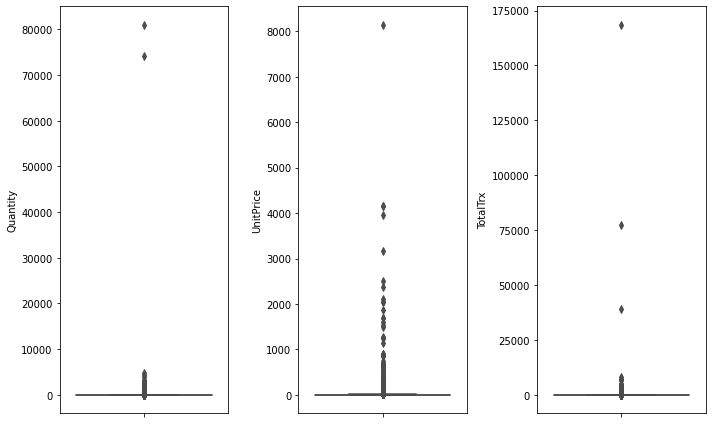

In [43]:
# adjust the figure size for better readability
plt.figure(figsize=(10,6))
# plotting
features = val
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[val[i]], color='yellow')
    plt.tight_layout()


In [44]:
# # def check_outlier(data, column):
# def check_outlier(data, column):
#     q1 = data[column].quantile(0.25)
#     q3 = data[column].quantile(0.75)
#     iqr = q3 - q1
    
#     return ['outlier' if (x<q1-1.5*iqr or x>q3+1.5*iqr) 
#                                  else 'not-outlier' for x in data[column].values]


In [45]:
#check
df[df['Quantity']>70000]

InvoiceNo StockCode                     Description  Quantity  \
61619     541431     23166  MEDIUM CERAMIC TOP STORAGE JAR     74215   
540421    581483     23843     PAPER CRAFT , LITTLE BIRDIE     80995   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalTrx  \
61619  2011-01-18 10:01:00       1.04     12346.0  United Kingdom   77183.6   
540421 2011-12-09 09:15:00       2.08     16446.0  United Kingdom  168469.6   

           invDate  year  month  day  hour  
61619   2011-01-18  2011      1   18    10  
540421  2011-12-09  2011     12    9     9

In [46]:
df[df['TotalTrx']>25000]

InvoiceNo StockCode                     Description  Quantity  \
61619     541431     23166  MEDIUM CERAMIC TOP STORAGE JAR     74215   
222680    556444     22502      PICNIC BASKET WICKER SMALL        60   
540421    581483     23843     PAPER CRAFT , LITTLE BIRDIE     80995   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalTrx  \
61619  2011-01-18 10:01:00       1.04     12346.0  United Kingdom   77183.6   
222680 2011-06-10 15:28:00     649.50     15098.0  United Kingdom   38970.0   
540421 2011-12-09 09:15:00       2.08     16446.0  United Kingdom  168469.6   

           invDate  year  month  day  hour  
61619   2011-01-18  2011      1   18    10  
222680  2011-06-10  2011      6   10    15  
540421  2011-12-09  2011     12    9     9

In [47]:
# #create a list from dfgroups which cleaned
# listcustnotna = dfgroups['CustomerID']

# #create search function to find customerID which has anommaly
# def find_cust_id(a,b):
#   custnotna = []
#   for x in a:
#       for y in b:
#           if x == y:
#               custnotna.append(y) #append y which custID = listcustnotna
#               break
#   return custnotna

# res_sim_cust = find_cust_id(listcustnotna,df['CustomerID'])
          


    
# df['cust_outlier'] = df['Customer_ID'].apply(lambda x: (lasttransall - x).days)
# df.head

In [48]:
# notsna = dict(zip(res_sim_cust, res_sim_cust))
# #fill customer ID not outlier in dataframe
# df['custid_outlier'] = df['CustomerID'].apply(lambda x: notsna.get(x))

In [49]:
# def kelas for grouping total spent to handling outlier
def kelas(data, column):
    q1 = data[column].quantile(0.25)
    q2 = data[column].median()
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    return [1 if x <= q1 else
            2 if x > q1 and x <= q2 else
            3 if x > q2 and x <= q3 else
            4 for x in data[column].values]

# RFM Analysis
I got references from https://clevertap.com/blog/rfm-analysis/ to set RFM score

In [50]:
#last date available in our dataset
df['invDate'].max()

datetime.date(2011, 12, 9)

In [51]:
df = df[df['year']== 2011]

In [52]:
df.shape

(371727, 14)

In [53]:
#group by customers and check last date of purshace
recency_df = df.groupby(by='CustomerID', as_index=False)['invDate'].max()
recency_df.columns = ['CustomerID','LastPurchaseDate']
recency_df.head()

CustomerID LastPurchaseDate
0     12346.0       2011-01-18
1     12347.0       2011-12-07
2     12348.0       2011-09-25
3     12349.0       2011-11-21
4     12350.0       2011-02-02

last transaction in the dataset is in 2011-12-09, we will use the date to the last trancation.

In [54]:
lasttransall = dt.date(2011,12,9)
print(lasttransall)

2011-12-09


## Recency

In [55]:
#calculate recency
recency_df['recency'] = recency_df['LastPurchaseDate'].apply(lambda x: (lasttransall - x).days)

In [56]:
#drop LastPurchaseDate columns
recency_df.drop(columns='LastPurchaseDate', inplace=True)
recency_df.head(2)

CustomerID  recency
0     12346.0      325
1     12347.0        2

## Frequency

In [57]:
#calculate frequency of purchases
frequency_df = df.groupby(by=['CustomerID'], as_index=False)['InvoiceNo'].count()
frequency_df.columns = ['CustomerID','frequency']
frequency_df.head()

CustomerID  frequency
0     12346.0          1
1     12347.0        151
2     12348.0         14
3     12349.0         73
4     12350.0         17

## Monetary

In [58]:
#grouping totaltrx aggregate by sum 
monetary_df = df.groupby(by='CustomerID',as_index=False).agg({'TotalTrx': 'sum'})
monetary_df.columns = ['CustomerID','monetary']
monetary_df.head()

CustomerID  monetary
0     12346.0  77183.60
1     12347.0   3598.21
2     12348.0    904.44
3     12349.0   1757.55
4     12350.0    334.40

In [59]:
#merging rfm data
rfm_df = pd.merge(recency_df, frequency_df, on="CustomerID")

In [60]:
#merging rfm data
rfm_df = pd.merge(rfm_df, monetary_df, on="CustomerID")

In [61]:
rfm_df.head()

CustomerID  recency  frequency  monetary
0     12346.0      325          1  77183.60
1     12347.0        2        151   3598.21
2     12348.0       75         14    904.44
3     12349.0       18         73   1757.55
4     12350.0      310         17    334.40

In [62]:
rfm_df.describe()

CustomerID      recency    frequency       monetary
count   4219.000000  4219.000000  4219.000000    4219.000000
mean   15290.745674    84.346765    88.107845    1976.462198
std     1720.241351    90.080697   219.488584    8670.578595
min    12346.000000     0.000000     1.000000       3.750000
25%    13807.000000    17.000000    17.000000     304.360000
50%    15281.000000    47.000000    40.000000     664.850000
75%    16772.000000   128.000000    96.500000    1614.610000
max    18287.000000   339.000000  7560.000000  271614.140000

## Visualization

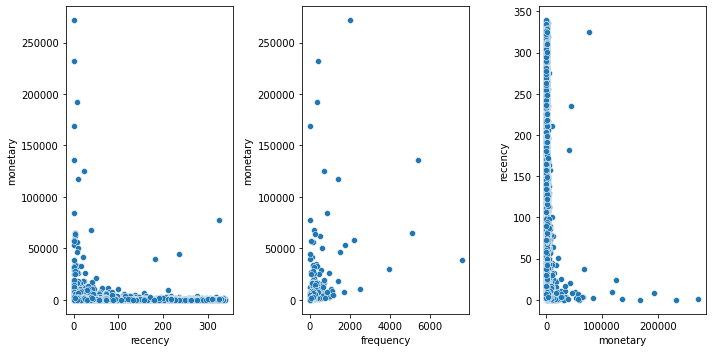

In [63]:
fig, axes = plt.subplots(1,3, figsize=(10,5))
sns.scatterplot(ax=axes[0],data=rfm_df,x='recency', y='monetary')
sns.scatterplot(ax=axes[1],data=rfm_df,x='frequency', y='monetary')
sns.scatterplot(ax=axes[2],data=rfm_df,y='recency', x='monetary')
plt.tight_layout()

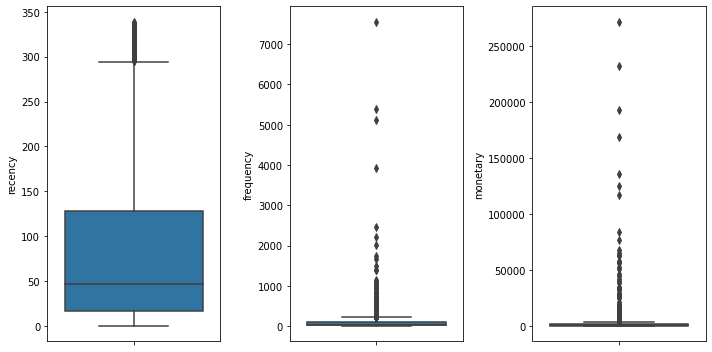

In [64]:
#boxplot for outlier check
fig, axes = plt.subplots(1,3, figsize=(10,5))
sns.boxplot(ax=axes[0],data=rfm_df,y='recency')
sns.boxplot(ax=axes[1],data=rfm_df,y='frequency')
sns.boxplot(ax=axes[2],data=rfm_df,y='monetary')
plt.tight_layout()

In [65]:
# # def quantile for scoring rfm(data, column):
# def quantile(data, column):
#     q1 = data[column].quantile(0.25)
#     q2 = data[column].median()
#     q3 = data[column].quantile(0.75)
#     iqr = q3 - q1
#     return [1 if x <= q1 else
#             2 if x > q1 and x <= q2 else
#             3 if x > q2 and x <= q3 else
#             4 for x in data[column].values]

# # def quantile for scoring rfm(data, column):
# def quantile_recency(data, column):
#     q1 = data[column].quantile(0.25)
#     q2 = data[column].median()
#     q3 = data[column].quantile(0.75)
#     iqr = q3 - q1
#     return [4 if x <= q1 else
#             3 if x > q1 and x <= q2 else
#             2 if x > q2 and x <= q3 else
#             1 for x in data[column].values]

In [66]:
rfm_df

CustomerID  recency  frequency  monetary
0        12346.0      325          1  77183.60
1        12347.0        2        151   3598.21
2        12348.0       75         14    904.44
3        12349.0       18         73   1757.55
4        12350.0      310         17    334.40
...          ...      ...        ...       ...
4214     18280.0      277         10    180.60
4215     18281.0      180          7     80.82
4216     18282.0        7         12    178.05
4217     18283.0        3        756   2094.88
4218     18287.0       42         70   1837.28

[4219 rows x 4 columns]

## Scoring RFM

In [67]:
#define function for recency scoring
def recscore(data, column):
    return [1 if (x <= 365 and x > 300) else
             2 if (x <= 300 and x > 240) else
             3 if (x <= 240 and x > 180) else
             4 if (x <= 180 and x > 120) else
             5 if (x <= 120 and x > 60) else
             6 if (x <= 60 and x >= 0) else 'none' for x in data[column]]

#define function for frequency scoring
def freqscore(data, column):
    return [1 if (x > 0 and x < 3) else
             2 if (x >= 3 and x < 5) else
             3 if (x >= 5 and x < 7) else
             4 if (x >= 7 and x < 10) else
             5 if (x >= 10 and x < 15) else 
             6 if (x >=15) else 'none' for x in rfm_df['frequency']]

#define function for monetary scoring
def monscore(data, column):
    return [1 if (x > 0 and x <= 1000) else
             2 if (x > 1000 and x <= 3000) else
             3 if (x > 3000 and x <= 5000) else
             4 if (x > 5000 and x <= 7000) else
             5 if (x > 7000 and x <=10000 ) else
             6 if (x > 10000) else 'none' for x in rfm_df['monetary']]

#appply into dataframe
rfm_df['rscore'] =  recscore(data=rfm_df, column='recency')
rfm_df['fscore'] =  freqscore(data=rfm_df, column='frequency')
rfm_df['mscore'] =  monscore(data=rfm_df, column='monetary')




In [68]:
# nanrfm = rfm_df[(rfm_df['rscore']=='none') | (rfm_df['fscore']=='none') | (rfm_df['mscore']=='none')]
# nanrfm

In [69]:
rfm_df.shape

(4219, 7)

In [70]:
# #scoring on recency score
# rfm_df['rscore'] = quantile_recency(data=rfm_df, column='recency')
# #scoring on frequency score
# rfm_df['fscore'] = quantile(data=rfm_df, column='frequency')
# #scoring on monetary score
# rfm_df['mscore'] = quantile(data=rfm_df, column='monetary')

In [72]:
fin = ['rscore','fscore','mscore']
rfm = rfm_df[fin]

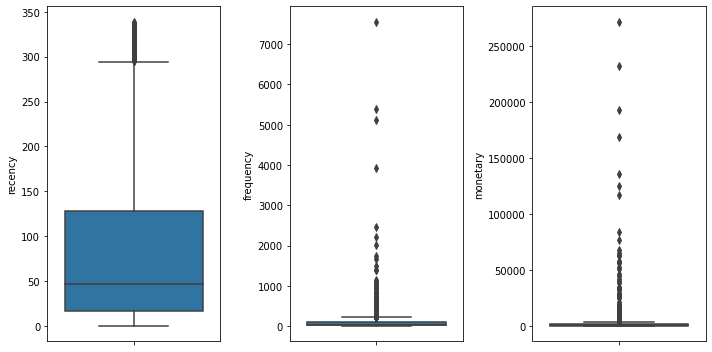

In [73]:
#boxplot for outlier check
fig, axes = plt.subplots(1,3, figsize=(10,5))
sns.boxplot(ax=axes[0],data=rfm_df,y='recency')
sns.boxplot(ax=axes[1],data=rfm_df,y='frequency')
sns.boxplot(ax=axes[2],data=rfm_df,y='monetary')
plt.tight_layout()


In [74]:
rfm

rscore  fscore  mscore
0          1       1       6
1          6       6       3
2          5       5       1
3          6       6       2
4          1       6       1
...      ...     ...     ...
4214       2       5       1
4215       4       4       1
4216       6       5       1
4217       6       6       2
4218       6       6       2

[4219 rows x 3 columns]

In [ ]:
# lr = rfm['rscore'].astype(str)
# lf = rfm['fscore'].astype(str)
# lm = rfm['mscore'].astype(str)

# rfm['cluster'] = lr + lf + lm

# df["Period"] = df["Courses"].map(str) + "-" + df["Duration"]

In [75]:
rfm.shape

(4219, 3)

# Segmentation WIth K-Means


In [76]:
#import Kmeans 
from sklearn.cluster import KMeans
inertia = []

#find potential K from data
for i in range(2, 20):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(rfm.values)
    inertia.append(kmeans.inertia_)

In [165]:
import plotly.express as px

x = np.arange(2,20)
fig = px.line(x=x, y=inertia,markers=True,title="Elbow Methode", 
              labels={'x':'K', 'y':'Inertia'},text=x,range_x=[0, 20])

fig.update_traces(marker_size=10,textposition="bottom center")
fig.update_layout(
    autosize=False,
    width=800,
    height=600)
fig.show()


ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

we have K=4 which potential K

In [82]:
# showing value of Inertia 
inertia = pd.DataFrame(inertia)
inertia

0
0   11580.862031
1    7988.787851
2    5253.160097
3    4329.306799
4    3415.270583
5    2668.417171
6    2368.129284
7    2094.880444
8    1830.196791
9    1540.845774
10   1419.627383
11   1302.690520
12   1146.073748
13   1054.327291
14   1004.049442
15    846.311285
16    800.951886
17    726.493357

In [83]:
from sklearn.metrics import silhouette_score
from sklearn import metrics

In [84]:
#define value of cluster for finding K using Sillhoute score
range_n_clusters = list(range(2,20))
print(range_n_clusters)

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [85]:
#define empty list for append score
arr_silhouette_score_euclidean = []
#looping for finding n cluster
for i in range_n_clusters:
    
    kmeans = KMeans(n_clusters=i).fit(rfm)
    preds = kmeans.predict(rfm)
    
    score_euclidean = silhouette_score(rfm, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)

In [86]:
#showing sillhoute score
arr_silhouette_score_euclidean

[0.5043771261399977,
 0.5320559250935452,
 0.5388861725209262,
 0.5466667294067371,
 0.5076656642807006,
 0.5435514266891205,
 0.561448468655077,
 0.5932124423080007,
 0.6158333501237806,
 0.6835470226993542,
 0.6598370951308186,
 0.6672502995373036,
 0.7279810634763912,
 0.7435536584977952,
 0.7299142806357145,
 0.7600825990629662,
 0.7783363555987218,
 0.7965188617469572]

In [164]:
import plotly.express as px

x = np.arange(2,20)
fig = px.line(x=x, y=arr_silhouette_score_euclidean,markers=True,
              title="Finding Optimal K Using Sillhoute Score",
              labels={'x':'K', 'y':'Sillhooute Score'},text=x)
fig.update_traces(marker_size=10,textposition="bottom center")
fig.update_layout(
    autosize=False,
    width=800,
    height=600)
fig.show()

we have any potential value from sillhoure score, distance methode with euclidean distance and we got n = 2 and n 4 which potential, but we'll take 4 because in inertia we got 4 too.

In [89]:
#define ncluster = 4 and fit dataframe
kmeans = KMeans(n_clusters=4).fit(rfm)
#predicting
preds = kmeans.predict(rfm)

In [90]:
#add predicting columns into rfm dataframe
rfm_df['cluster'] = preds

In [ ]:
# #evaliuation
# rand = []
# x = np.arange(2,20)
# for i in x:
#     kmeans = KMeans(n_clusters=i, random_state=0)
#     kmeans.fit(rfm.values)
#     rand_ = metrics.adjusted_rand_score(rfm_df.cluster, kmeans.labels_)
#     rand.append(rand_)
# print(i,rand)

In [ ]:
# import plotly.express as px

# x = np.arange(2,20)
# fig = px.line(x=x, y=rand,markers=True,
#               title="Evaluation For K",
#               labels={'x':'K', 'y':'Rand Score'},text=x)
# fig.update_traces(marker_size=10,textposition="bottom center")
# fig.update_layout(
#     autosize=False,
#     width=800,
#     height=600)
# fig.show()

In [91]:
rfm_df.cluster.value_counts()

2    2450
1     913
0     505
3     351
Name: cluster, dtype: int64

In [92]:
clust1 = rfm_df[rfm_df['cluster']==0]
clust2 = rfm_df[rfm_df['cluster']==1]
clust3 = rfm_df[rfm_df['cluster']==2]
clust4 = rfm_df[rfm_df['cluster']==3]
clust1.head()

CustomerID  recency  frequency  monetary  rscore  fscore  mscore  cluster
1      12347.0        2        151   3598.21       6       6       3        0
10     12357.0       33        131   6207.67       6       6       4        0
12     12359.0       57        248   6372.58       6       6       4        0
15     12362.0        3        266   5226.23       6       6       4        0
27     12378.0      129        219   4008.62       4       6       3        0

In [95]:
# #visualization
# sns.boxplot(data=clust1, x = 'monetary')


In [96]:
mon = rfm_df.monetary/10
clus = rfm_df.cluster


import plotly.graph_objects as go


fig = go.Figure()
# fig.add_trace(go.Histogram(x=clus, y=rfm_df.monetary, histfunc='sum',))
fig.add_trace(go.Histogram(x=clus, y=rfm_df.frequency, histfunc='sum',name='Frequency'))
fig.add_trace(go.Histogram(x=clus, y=rfm_df.recency, histfunc='sum',name='Recency'))
fig.add_trace(go.Histogram(x=clus, y=mon, histfunc='sum',name='Monetary'))

fig.show()

In [166]:
import plotly.express as px
fig = px.histogram(rfm_df, x="recency",y='cluster',color='cluster')
fig.show()

In [168]:
import plotly.express as px
fig = px.histogram(rfm_df, x="frequency",y='cluster',color='cluster')
fig.show()

In [169]:
import plotly.express as px
fig = px.histogram(rfm_df, x="monetary",y='cluster',color='cluster')
fig.show()

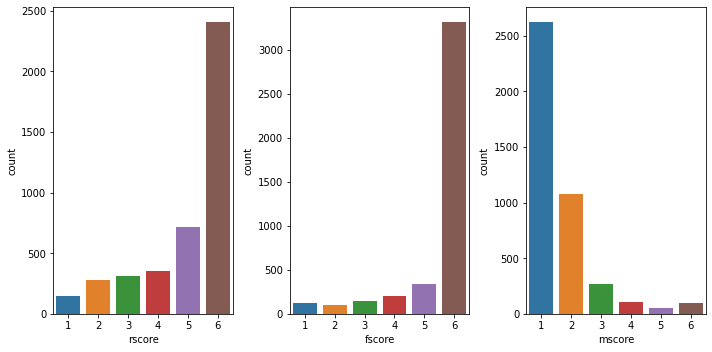

In [102]:
#visualization
fig, axes = plt.subplots(1,3, figsize=(10,5))
sns.countplot(ax=axes[0],data=rfm_df,x='rscore')
sns.countplot(ax=axes[1],data=rfm_df,x='fscore')
sns.countplot(ax=axes[2],data=rfm_df,x='mscore')
plt.tight_layout()

In [103]:
rfm_df['cluster'] = rfm_df['cluster'].astype(str)

In [104]:
import plotly.express as px

fig = px.scatter(rfm_df, x="rscore", y="fscore", symbol="cluster", color='cluster' ,
                 width=800, height=500,
                 size='fscore',hover_data=['cluster'])
fig.update_layout(
    margin=dict(l=10, r=10, t=10, b=10),
    paper_bgcolor="white",
)

fig.show()

In [105]:
import plotly.express as px

fig = px.scatter(rfm_df, x="rscore", y="mscore", symbol="cluster", color='cluster' ,
                 width=800, height=500,
                 size='rscore',hover_data=['cluster'])
fig.update_layout(
    margin=dict(l=10, r=10, t=10, b=10),
    paper_bgcolor="white",
)

fig.show()

In [106]:
import plotly.express as px

fig = px.scatter(rfm_df, x="fscore", y="mscore", symbol="cluster", color='cluster' ,
                 width=800, height=500,
                 size='mscore',hover_data=['cluster'])
fig.update_layout(
    margin=dict(l=10, r=10, t=10, b=10),
    paper_bgcolor="white",
)

fig.show()

In [160]:
import plotly.express as px

fig = px.scatter(rfm_df, x="frequency", y="recency", symbol="cluster", color='cluster',
                 width=800, height=500,
                 hover_data=['cluster'])
fig.update_layout(
    margin=dict(l=10, r=10, t=10, b=10),
    paper_bgcolor="white",
)

fig.show()

In [163]:
import plotly.express as px

fig = px.scatter(rfm_df, x="monetary", y="recency", symbol="cluster", color='cluster',
                 width=800, height=500,
                 hover_data=['cluster'])
fig.update_layout(
    margin=dict(l=10, r=10, t=10, b=10),
    paper_bgcolor="white",
)

fig.show()

In [161]:
import plotly.express as px

fig = px.scatter(rfm_df, x="monetary", y=rfm_df.frequency, symbol="cluster", color='cluster',
                 width=800, height=500,
                 hover_data=['cluster'])
fig.update_layout(
    margin=dict(l=10, r=10, t=10, b=10),
    paper_bgcolor="white",
)

fig.show()

In [162]:
fig = px.scatter_3d(rfm_df, x = 'recency', y='frequency', z='monetary',
              color='cluster', opacity = 0.8)
fig.show()

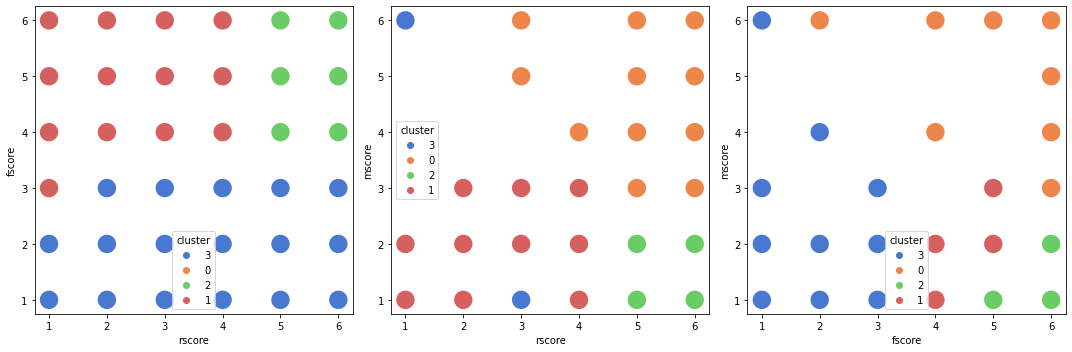

In [111]:
fig, axes = plt.subplots(1,3, figsize=(15,5))
sns.scatterplot(ax=axes[0],data=rfm_df, y = 'fscore', x = 'rscore', hue='cluster', palette="muted", s=400)
sns.scatterplot(ax=axes[1],data=rfm_df, y = 'mscore',  x = 'rscore', hue='cluster',palette="muted", s=400)
sns.scatterplot(ax=axes[2],data=rfm_df, y = 'mscore', x = 'fscore', hue='cluster', palette="muted", s=400)
plt.tight_layout()


In [145]:
#adding description for each clusters references https://www.optimove.com/resources/learning-center/rfm-segmentation


map_class = {'3':'New Customers Low Spending',
             '2':'Midlle Spending Active customers',
             '1':'Low Spending Pasif customers',
             '0':'Best Customers'
            }
rfm_df['class'] = rfm_df['cluster'].map(map_class)
dd = ['recency','frequency','monetary','cluster']
rfm_check = rfm_df[dd]

In [146]:
clust1.describe()

CustomerID     recency    frequency       monetary      rscore  \
count    505.000000  505.000000   505.000000     505.000000  505.000000   
mean   14959.891089   22.552475   323.885149   10371.193267    5.881188   
std     1791.402358   30.564882   552.549612   23034.348569    0.400573   
min    12347.000000    0.000000     3.000000    3000.200000    3.000000   
25%    13268.000000    3.000000   132.000000    3650.410000    6.000000   
50%    14849.000000   11.000000   212.000000    4932.200000    6.000000   
75%    16556.000000   29.000000   337.000000    7723.620000    6.000000   
max    18272.000000  235.000000  7560.000000  271614.140000    6.000000   

           fscore      mscore  cluster  
count  505.000000  505.000000    505.0  
mean     5.978218    3.960396      0.0  
std      0.230426    1.162585      0.0  
min      2.000000    3.000000      0.0  
25%      6.000000    3.000000      0.0  
50%      6.000000    3.000000      0.0  
75%      6.000000    5.000000      0.0  
max      6.000000    6.000000      0.0

In [147]:
clust2.describe()

CustomerID     recency   frequency     monetary      rscore  \
count    913.000000  913.000000  913.000000   913.000000  913.000000   
mean   15303.359255  219.532311   32.865279   519.568194    2.799562   
std     1730.414360   61.585016   36.011670   511.469853    1.052524   
min    12350.000000  121.000000    5.000000    38.720000    1.000000   
25%    13803.000000  168.000000   13.000000   201.190000    2.000000   
50%    15246.000000  213.000000   22.000000   336.030000    3.000000   
75%    16810.000000  269.000000   38.000000   618.630000    4.000000   
max    18281.000000  339.000000  543.000000  4036.960000    4.000000   

           fscore      mscore  cluster  
count  913.000000  913.000000    913.0  
mean     5.562979    1.136911      1.0  
std      0.742380    0.356466      0.0  
min      3.000000    1.000000      1.0  
25%      5.000000    1.000000      1.0  
50%      6.000000    1.000000      1.0  
75%      6.000000    1.000000      1.0  
max      6.000000    3.000000      1.0

In [148]:
clust3.describe()

CustomerID      recency    frequency     monetary      rscore  \
count   2450.000000  2450.000000  2450.000000  2450.000000  2450.00000   
mean   15329.838367    39.305714    72.218367   976.824883     5.75102   
std     1694.835090    30.588698    76.014667   731.269630     0.43251   
min    12348.000000     0.000000     7.000000    20.350000     5.00000   
25%    13876.500000    15.000000    25.000000   380.780000     6.00000   
50%    15353.000000    31.000000    49.000000   751.080000     6.00000   
75%    16790.750000    60.000000    93.000000  1413.480000     6.00000   
max    18287.000000   120.000000   756.000000  2996.050000     6.00000   

            fscore       mscore  cluster  
count  2450.000000  2450.000000   2450.0  
mean      5.848980     1.386122      2.0  
std       0.455501     0.486959      0.0  
min       4.000000     1.000000      2.0  
25%       6.000000     1.000000      2.0  
50%       6.000000     1.000000      2.0  
75%       6.000000     2.000000      2.0  
max       6.000000     2.000000      2.0

In [149]:
clust4.describe()

CustomerID     recency   frequency      monetary      rscore  \
count    351.000000  351.000000  351.000000    351.000000  351.000000   
mean   15461.082621  136.005698    3.487179    665.682877    4.205128   
std     1715.293207   99.789636    1.815562   4649.525137    1.643368   
min    12346.000000    1.000000    1.000000      3.750000    1.000000   
25%    14049.000000   46.000000    2.000000     89.100000    3.000000   
50%    15510.000000  119.000000    3.000000    143.460000    5.000000   
75%    16964.500000  218.000000    5.000000    335.960000    6.000000   
max    18273.000000  337.000000    6.000000  77183.600000    6.000000   

           fscore      mscore  cluster  
count  351.000000  351.000000    351.0  
mean     2.008547    1.102564      3.0  
std      0.856862    0.496582      0.0  
min      1.000000    1.000000      3.0  
25%      1.000000    1.000000      3.0  
50%      2.000000    1.000000      3.0  
75%      3.000000    1.000000      3.0  
max      3.000000    6.000000      3.0

In [151]:
mmx = [clust1,clust2,clust3,clust4]

In [152]:
minmax = []
for mimax in mmx:
    c = mimax.min()
    b = mimax.max()
#     minmax.append(c)
#     minmax.append(b)
    print('Min Transaction')
    print(c)
    print('\n')
    print('Max Transaction')
    print(b)
    print('\n')
print(minmax)

Min Transaction
CustomerID    12347.0
recency           0.0
frequency         3.0
monetary       3000.2
rscore            3.0
fscore            2.0
mscore            3.0
cluster           0.0
dtype: float64


Max Transaction
CustomerID     18272.00
recency          235.00
frequency       7560.00
monetary      271614.14
rscore             6.00
fscore             6.00
mscore             6.00
cluster            0.00
dtype: float64


Min Transaction
CustomerID    12350.00
recency         121.00
frequency         5.00
monetary         38.72
rscore            1.00
fscore            3.00
mscore            1.00
cluster           1.00
dtype: float64


Max Transaction
CustomerID    18281.00
recency         339.00
frequency       543.00
monetary       4036.96
rscore            4.00
fscore            6.00
mscore            3.00
cluster           1.00
dtype: float64


Min Transaction
CustomerID    12348.00
recency           0.00
frequency         7.00
monetary         20.35
rscore            5.00
f

In [ ]:
df.head(2)

# Filling Cluster into Dataframe

In [116]:
df.head(3)

InvoiceNo StockCode              Description  Quantity  \
42481    539993     22386  JUMBO BAG PINK POLKADOT        10   
42482    539993     21499       BLUE POLKADOT WRAP        25   
42483    539993     21498      RED RETROSPOT WRAP         25   

              InvoiceDate  UnitPrice  CustomerID         Country  TotalTrx  \
42481 2011-01-04 10:00:00       1.95     13313.0  United Kingdom      19.5   
42482 2011-01-04 10:00:00       0.42     13313.0  United Kingdom      10.5   
42483 2011-01-04 10:00:00       0.42     13313.0  United Kingdom      10.5   

          invDate  year  month  day  hour  
42481  2011-01-04  2011      1    4    10  
42482  2011-01-04  2011      1    4    10  
42483  2011-01-04  2011      1    4    10

In [153]:
temp = rfm_df[['CustomerID','cluster']].reset_index(drop=True)
temp

CustomerID cluster
0        12346.0       3
1        12347.0       0
2        12348.0       2
3        12349.0       2
4        12350.0       1
...          ...     ...
4214     18280.0       1
4215     18281.0       1
4216     18282.0       2
4217     18283.0       2
4218     18287.0       2

[4219 rows x 2 columns]

In [154]:
#define cluster from dataframe to dictionary
temp1 = temp.set_index('CustomerID')['cluster'].to_dict()

In [155]:
 # df['cluster'] = rfm_df['CustomerID'].apply(temp1)
df['cluster'] = df['CustomerID'].apply(lambda x: temp1.get(x,x))

In [157]:
rfm_df[rfm_df['cluster']=='3']

CustomerID  recency  frequency  monetary  rscore  fscore  mscore  \
0        12346.0      325          1  77183.60       1       1       6   
6        12353.0      204          4     89.00       3       2       1   
33       12386.0      337          2    143.00       1       1       1   
45       12403.0       49          5    427.70       6       3       1   
79       12445.0       22          4    133.40       6       2       1   
...          ...      ...        ...       ...     ...     ...     ...   
4188     18240.0       46          6    422.58       6       3       1   
4192     18246.0       23          4    596.10       6       2       1   
4198     18255.0       89          6    103.30       5       3       1   
4206     18268.0      134          1     25.50       4       1       1   
4209     18273.0        2          3    204.00       6       2       1   

     cluster                       class  
0          3  New Customers Low Spending  
6          3  New Customers Low Spending  
33         3  New Customers Low Spending  
45         3  New Customers Low Spending  
79         3  New Customers Low Spending  
...      ...                         ...  
4188       3  New Customers Low Spending  
4192       3  New Customers Low Spending  
4198       3  New Customers Low Spending  
4206       3  New Customers Low Spending  
4209       3  New Customers Low Spending  

[351 rows x 9 columns]

In [125]:
df['class'] = df['cluster'].map(map_class)


In [127]:
#check 
df[df['cluster']=='2']

InvoiceNo StockCode                      Description  Quantity  \
42481     539993     22386          JUMBO BAG PINK POLKADOT        10   
42482     539993     21499               BLUE POLKADOT WRAP        25   
42483     539993     21498              RED RETROSPOT WRAP         25   
42484     539993     22379         RECYCLING BAG RETROSPOT          5   
42485     539993     20718        RED RETROSPOT SHOPPER BAG        10   
...          ...       ...                              ...       ...   
541904    581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138    BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalTrx  \
42481  2011-01-04 10:00:00       1.95     13313.0  United Kingdom     19.50   
42482  2011-01-04 10:00:00       0.42     13313.0  United Kingdom     10.50   
42483  2011-01-04 10:00:00       0.42     13313.0  United Kingdom     10.50   
42484  2011-01-04 10:00:00       2.10     13313.0  United Kingdom     10.50   
42485  2011-01-04 10:00:00       1.25     13313.0  United Kingdom     12.50   
...                    ...        ...         ...             ...       ...   
541904 2011-12-09 12:50:00       0.85     12680.0          France     10.20   
541905 2011-12-09 12:50:00       2.10     12680.0          France     12.60   
541906 2011-12-09 12:50:00       4.15     12680.0          France     16.60   
541907 2011-12-09 12:50:00       4.15     12680.0          France     16.60   
541908 2011-12-09 12:50:00       4.95     12680.0          France     14.85   

           invDate  year  month  day  hour cluster  \
42481   2011-01-04  2011      1    4    10       2   
42482   2011-01-04  2011      1    4    10       2   
42483   2011-01-04  2011      1    4    10       2   
42484   2011-01-04  2011      1    4    10       2   
42485   2011-01-04  2011      1    4    10       2   
...            ...   ...    ...  ...   ...     ...   
541904  2011-12-09  2011     12    9    12       2   
541905  2011-12-09  2011     12    9    12       2   
541906  2011-12-09  2011     12    9    12       2   
541907  2011-12-09  2011     12    9    12       2   
541908  2011-12-09  2011     12    9    12       2   

                              class  
42481   High Spending old customers  
42482   High Spending old customers  
42483   High Spending old customers  
42484   High Spending old customers  
42485   High Spending old customers  
...                             ...  
541904  High Spending old customers  
541905  High Spending old customers  
541906  High Spending old customers  
541907  High Spending old customers  
541908  High Spending old customers  

[176935 rows x 16 columns]

In [173]:
#export data to csv
df.to_csv('cleaned_df.csv')
rfm_df.to_csv('cust_seg.csv')